# Introdução a regressão com redes neurais no TensorFlow

  Existem muita definições para um problema de regressão, mas no nosso caso, nós vamos simplificar em: predizendo um número variável baseado em alguma outra combinação de variáveis. Predizer um número.

In [ ]:
# Importando o tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


### Criando dados para visualizar e formar 

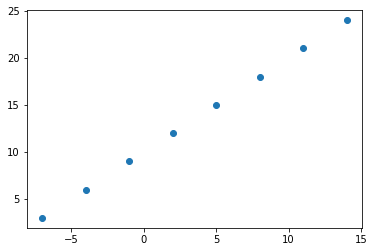

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Criando recursos
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Criando as labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizar os dados criados
plt.scatter(X,y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Tamanhos da entrada e da saida

In [ ]:
# Criar um tensor de demonstração para um problema de predição hipotético
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([92900])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [ ]:
X.shape, y.shape

((8,), (8,))

In [ ]:
# Utilizamos o valor de X para predizer qual seria o valor de y
X[0], y[0] 

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
# Transformar um array NumPy em tensores
X = tf.constant (X)
y = tf.constant (y)
X,y

# Colocando-os do tipo float32 para não dar nenhum tipo de erro com o modelo, já que por padrão, ele utiliza o tamanho float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

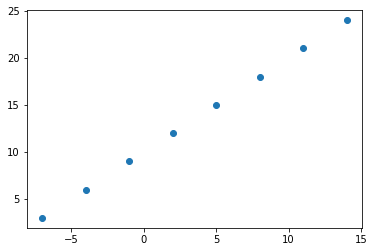

In [ ]:
plt.scatter(X,y)

## Etapas na modelagem com Tensorflow

1. **Criar um modelo** - Definir as camadas de entrada e saida, assim como as camadas escondidas do modelo de deep learning. 
2. **Compilar nosso modelo** - Definir a função de perda (em outras palavras, a função que fala para o nosso modelo o quão errado ele está) e o otimizador (diz a nosso modelo como melhorar os padrões que ele está aprendendo) e os metódos de avaliação (o que podemos fazer para interpretar os resultados do nosso modelo).
3. **Preencher o modelo** - Deixar o modelo tentar achar padrões entre X & y (ou, recursos e labels).
4. **Validar nosso modelo** - Comparar os resultados obtidos com os resultados esperados para avaliar o quão certo está nosso modelo.

* **Loss:** O quão errado as predições do seu modelo estão em comparação com as predições corretas.
* **Optimizer:** Como o seu modelo irá melhorar seus padrões internos para melhorar suas predições.
* **Metrics:** Valores interpretáveis por humanos para o quão bom seu modelo está sendo.
* **Epochs:** Por quantas vezes o modelo vai refazer os treinos.

In [ ]:
# Setando a random seed
tf.random.set_seed(42)

# 1. Criando um modelo usando a API Sequencial
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)  #Dense é o mesmo que uma "camada totalmente conectada"
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae, #mae significa mean absolute error (erro médio absoluto) (pesquisar google)
              optimizer=tf.keras.optimizers.SGD(),#sgd significa stochastic gradient descent (google)
              metrics=["mae"])

# 3. Preencher o modelo
model.fit (X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 590ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Checando X e y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Fazendo uma predição usando nosso modelo
y_pred = model.predict ([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Melhorar nosso modelo

Podemos melhorar nosso modelo, ao alterar os passos que usamos para criar o modelo.

1. **Criar um modelo** - Aqui podemos adicionar mais camadas, aumentar o número de unidades escondidas (ou neurônios) dentro de cada uma dessas camadas escondidas, mudar a função de ativação de cada camada. 
2. **Compilar o modelo** - Aqui podemos mudar a função de otimização, a **taxa de aprendizagem** da função de otimização.
3. **Preenchendo o modelo** - Podemos preencher o modelo com mais epochs, ou seja, treinar por mais tempo. Dar mais exemplos para qual o nosso modelo pode aprender.

In [ ]:
# Recriando nosso modelo

# 1. Criando o modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Preencher o modelo (dessa vez, vamos treinar por mais tempo)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 8m

In [ ]:
# Os dados originais
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Predizer o valor de y utilizando o modelo
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Recriando nosso modelo

# 1. Criando o modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Preencher o modelo
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 322ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [ ]:
# Os dados originais
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Predizer o valor de y utilizando o modelo
model.predict([17.0])

array([[31.223137]], dtype=float32)

In [ ]:
# Predizer o valor de y utilizando o modelo para valores dentro dos já criados
model.predict([14.0])

array([[25.886572]], dtype=float32)

In [ ]:
# Recriando nosso modelo

# 1. Criando o modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None), #Modificado a função de ativação para nenhuma
  tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Preencher o modelo
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7908 - mae: 11.7908
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2845 - mae: 11.2845
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7678 - mae: 10.7678
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2381 - mae: 10.2381
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.6928 - mae: 9.6928
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1289 - mae: 9.1289
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5437 - mae: 8.5437
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.9341 - mae: 7.9341
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2971 - mae: 7.2971
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - l

In [ ]:
# Predizer o valor de y utilizando o modelo
model.predict([17.0])

array([[30.220297]], dtype=float32)

In [ ]:
# Recriando nosso modelo

# 1. Criando o modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None), #Modificado a função de ativação para nenhuma
  tf.keras.layers.Dense(1)
])

# 2. Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),    #Modificado a função de otimização
              metrics=["mae"])                         #Mudar a velocidade de aprendizado  (Geral, é o hyperparâmetro mais importante para modificar no algoritmo)

# 3. Preencher o modelo
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 354ms/step - loss: 12.5419 - mae: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8482 - mae: 11.8482
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1529 - mae: 11.1529
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4547 - mae: 10.4547
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7511 - mae: 9.7511
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0391 - mae: 9.0391
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3156 - mae: 8.3156
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5775 - mae: 7.5775
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9147 - mae: 6.9147
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9004 - mae: 6.9004
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - lo

In [ ]:
# Predizer o valor de y utilizando o modelo
model.predict([17.0])

array([[26.868332]], dtype=float32)

## Validar a performance de um modelo

Na prática, tipicamente quando se está desenvolvendo uma rede neural é:

```
Criar o modelo -> Preencha-o -> Valide-o -> Modifique o modelo -> Preencha-o -> Valide-o -> Modifique o modelo -> ...

```

**1. Hyperparâmetros** = Como esses paramêtros que passamos podem ser facilmente 
modificados para verificar como a rede neural se comporta, eles são chamados de hyperparâmetros.


**2. Parâmetros:** São, geralmente, os padrões que a rede neural aprende, ou seja, não temos acesso direto e não codificamos, mas sim a própria rede neural faz isso sozinha.


> "A parte mais importante da validação do modelo é a visualização!!!!"

O que temos que visualizar:
* **Os dados:** Que tipo de dados estamos lidando? Como ele se parece?
* **O próprio modelo:** Como o nosso modelo se parece?
* **O treinamento do modelo:** Como é o desempenho do modelo enquanto ele aprende?
* **As predições do modelo:** Como as predições do modelo estão comparadas as esperadas?

In [ ]:
# Criar um dataset maior
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Criando as labels do dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

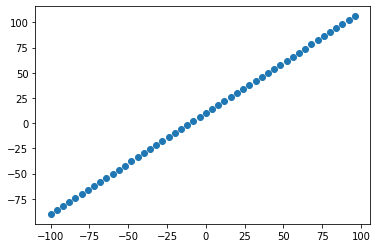

In [ ]:
# Visualizar os dados
import matplotlib.pyplot as plt

plt.scatter(X,y)

### Os três conjuntos... 

* **O conjunto de treinamento:** O modelo aprende desses dados. Tipicamente 70-80% do total dos dados disponíveis.
* **O conjunto de validação:** O modelo é ajustado a partir desses dados. Tipicamente 10-15% dos dados disponíveis.
* **O conjunto de testes:** O modelo é avaliado a partir desses dados, para testar o que ele aprendeu. Tipicamente 10-15% dos dados disponíveis.


In [ ]:
# Checar o comprimento das nossas amostras
len(X)

50

In [ ]:
# Separar os dados em treino e teste
X_treino = X[:40] #As primeiras 40 amostras dos dados. (80%)
y_treino = y[:40]

X_teste = X[40:] #As ultimas 10 amostras dos dados. (20%)
y_teste = y[40:]

len(X_treino), len(X_teste), len(y_treino), len(y_teste)

(40, 10, 40, 10)

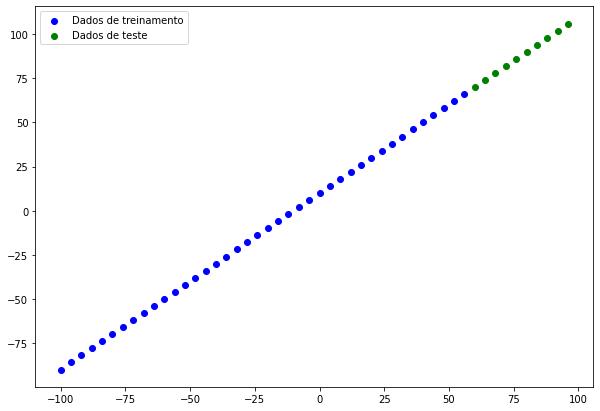

In [ ]:
# Visualizando os dados
plt.figure(figsize=(10,7))

#Plota o gráfico dos dados de treino na tela em azul
plt.scatter(X_treino, y_treino, c="b", label="Dados de treinamento")

#Plotar os dados de teste em vermelho
plt.scatter(X_teste, y_teste, c="g", label="Dados de teste")

#Configura a legenda
plt.legend();

In [ ]:
# Criando uma rede neural para os nossos novos dados

# Criar o modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Preencher o modelo
# model.fit(X_treino, y_treino, epochs=100)

In [ ]:
# Visualizar o modelo

model.summary()

ValueError: ignored

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Criando um modelo se constroi automaticamente definindo o argumento "input_shape" na primeira camada
tf.random.set_seed(42)

# Criando o modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) #Input_shape de um porque passamos apenas 1 valor para tentar predizer 1 valor
])

# Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* **Total params:** Número total de parâmetros no modelo.
* **Trainable params:** Os parâmetros (padrões) que o modelo pode melhorar enquanto treina.
* **Non-trainable params:** Os parâmetros não são melhorados enquanto treina (eles existem, tipicamente, quando você trás padrões já aprendidos ou parâmetros de outros modelos durante o processo de **transfer learning**)

[MIT](http://introtodeeplearning.com/)

In [ ]:
# Preencher o modelo
model.fit(X_treino, y_treino, epochs=100, verbose=0) #Pesquisar o parâmetro verbose na documentação do tensorflow

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


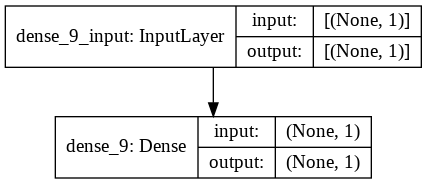

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
# Modificando dados do nosso modelo

# Criando um modelo se constroi automaticamente definindo o argumento "input_shape" na primeira camada
tf.random.set_seed(42)

# Criando o modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1], name="camada_entrada"),
  tf.keras.layers.Dense(1, name="camada_saida") #Input_shape de um porque passamos apenas 1 valor para tentar predizer 1 valor
], name = "modelo_teste")

# Compilar o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [ ]:
model.summary()

Model: "modelo_teste"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
camada_entrada (Dense)       (None, 1)                 2         
_________________________________________________________________
camada_saida (Dense)         (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Preencher o modelo
model.fit(X_treino, y_treino, epochs=100, verbose=0) #Pesquisar o parâmetro verbose na documentação do tensorflow

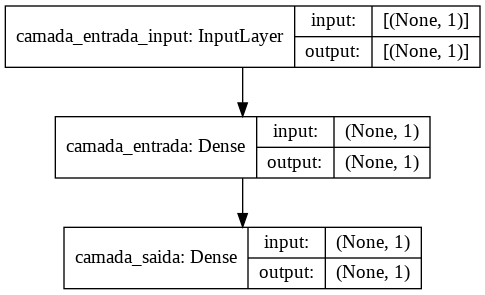

In [ ]:
plot_model(model, show_shapes=True)

**TERMINA O SEGUNDO DIA**

### Visualizando as predições do nosso modelo

Para visualizar predições, é uma boa ideia as plotar em comparação as predições esperadas. 

Tipicamente, você verá isso na forma de `y_test` ou `y_true` vs `y_pred` (predição esperada versus as predições obtidas).

In [ ]:
# Vamos fazer algumas predições
pred = model.predict(X_teste)
pred

array([[ 69.4672  ],
       [ 73.985695],
       [ 78.50417 ],
       [ 83.02267 ],
       [ 87.541145],
       [ 92.05964 ],
       [ 96.57812 ],
       [101.0966  ],
       [105.61509 ],
       [110.133575]], dtype=float32)

In [ ]:
y_teste

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Vamos criar uma função de plotagem
def mostra_predicoes(dado_treino=X_treino,
                     labels_treino=y_treino,
                     dado_teste=X_teste,
                     labels_teste=y_teste,
                     predicoes=pred):
  """
    Plota os dados de treino e teste, e compara com as predições realizadas pelo modelo
  """
  plt.figure(figsize=(10,7))
  #Plota os dados de treino em azul
  plt.scatter(dado_treino, labels_treino, c="b", label="Dados de treino")
  #Plota os dados de teste em verde
  plt.scatter(dado_teste, labels_teste, c="g", label="Dados de teste")
  #Plota as predições do modelo em vermelho
  plt.scatter(dado_teste, pred, c="r", label="Predições")
  plt.legend();

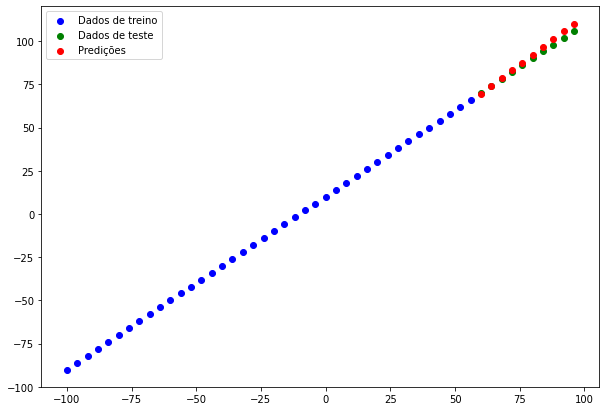

In [ ]:
 mostra_predicoes()

### Métricas de avaliação

Dependendo do problema que você está enfrentando, haverá diferentes métricas de avaliação para avaliar a performance do seu modelo. 

Como estamos trabalhando com um problema de regressão, duas das principais formas de avaliação são:

* **MAE - Mean absolute error (Erro médio absoluto):** "Em média, o quão erradas estão cada uma das predições do meu modelo". **É uma boa métrica "inicial" para qualquer problema de regressão.**

* **MSE  - Mean square error (Erro quadrático médio):** "Semelhante a outra, mas ele devolve o quadrado do erro médio". **É comum utilizar quando grandes erros são mais importantes do que erros menores.**

* **Huber** - É uma convenção das outras duas, ou seja, uma métrica mais robusta. Menos sensível a "outliers" do que o `MSE`.

In [ ]:
# Validando nosso modelo com uma métrica
model.evaluate(X_teste, y_teste, )

1/1 [==============================] - 0s 150ms/step - loss: 1.9098 - mae: 1.9098


[1.9098113775253296, 1.9098113775253296]

In [ ]:
# Calcular o erro médio absoluto
mae = tf.metrics.mean_absolute_error(y_true=y_teste, 
                                     y_pred=tf.constant(pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.532799, 14.811444, 12.198331, 10.595467, 10.      , 10.411928,
       11.831247, 14.257962, 17.692072, 22.133575], dtype=float32)>

In [ ]:
# Vamos verificar como são realmente esses dois tensores
pred, y_teste

(array([[ 69.4672  ],
        [ 73.985695],
        [ 78.50417 ],
        [ 83.02267 ],
        [ 87.541145],
        [ 92.05964 ],
        [ 96.57812 ],
        [101.0966  ],
        [105.61509 ],
        [110.133575]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Os valores sairam diferente do esperado, vamos verificar a dimensão dos dois tensores
pred.ndim, y_teste.ndim

(2, 1)

In [ ]:
# Retirando as dimensões unitárias do tensor com a função "squeeze"
tf.squeeze(pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.4672  ,  73.985695,  78.50417 ,  83.02267 ,  87.541145,
        92.05964 ,  96.57812 , 101.0966  , 105.61509 , 110.133575],
      dtype=float32)>

In [ ]:
# Calcular o erro médio absoluto novamente, agora redimensionando o tensor
mae = tf.metrics.mean_absolute_error(y_true=y_teste, 
                                     y_pred=tf.squeeze(pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9098114>

In [ ]:
# Calcular o erro quadrático médio
mse = tf.metrics.mean_squared_error(y_true=y_teste,
                                    y_pred=tf.squeeze(pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=5.459232>

In [ ]:
# Criar funções para reutilizar os métodos de avaliação
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_teste,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_teste,
                                       y_pred=tf.squeeze(y_pred))

### Rodando experimentos para melhorar nosso modelo


> ```Criar o modelo -> Preencha-o -> Valide-o -> Modifique o modelo -> Preencha-o -> Valide-o -> . . .```

1. Tenha mais dados - Obtenha mais dados para treinar seu modelo (mais oportunidades para aprender padrões ou relações entre conteúdo e rótulo).

2. Faça seu modelo maior (usar um modelo mais complexo) - Isso pode vir como mais camadas ou mais unidades em cada camada.

3. Treine por mais tempo - Dê ao seu modelo mais chances de observar os padrões entre os dados.

Vamos fazer três tipos de experimentos:

1. `model_1` - O mesmo modelo original, 1 camada, mas treinar por 100 epochs.
2. `model_2` - Duas camadas, treinadas por 100 epochs.
3. `model_3` - Duas camadas, treinar por 500 epochs.


**Criando modelo 1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Criar o modelo
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compilar o modelo
model_1.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Preencher o modelo
model_1.fit(X_treino, y_treino, epochs=100)

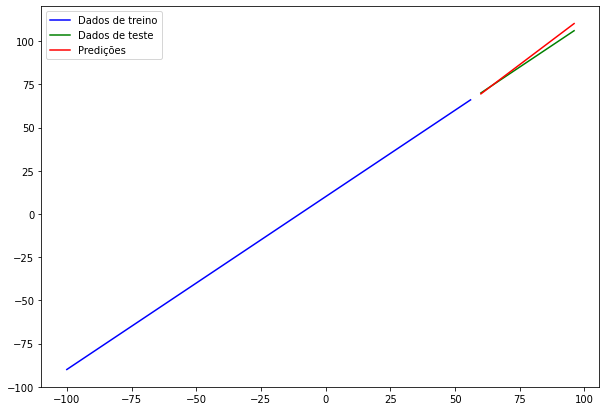

In [ ]:
# Fazendo algumas predições
y_pred_1 = model_1.predict(X_teste)
mostra_predicoes(predicoes=y_pred_1)

In [ ]:
# Calcular utilizando os métodos de avaliação
mae_1 = mae(y_teste, y_pred_1)
mse_1 = mse(y_teste, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Criando modelo 2**

* Duas camadas, 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Criando modelo
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compilar o modelo
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Preencher o modelo
model_2.fit(X_treino,y_treino, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 5ms/

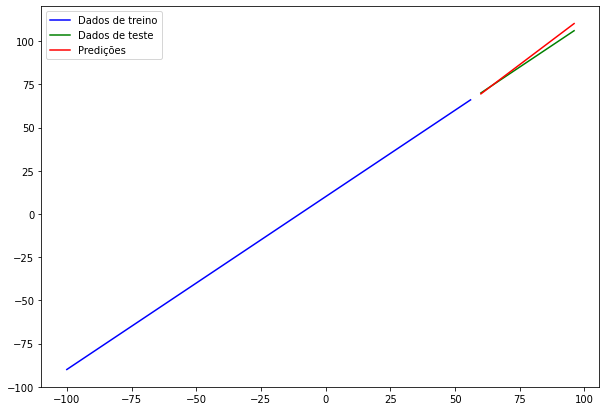

In [ ]:
# Faz e mostra as predições
y_pred_2 = model_2.predict(X_teste)
mostra_predicoes(predicoes=y_pred_2)

In [ ]:
# Calcular metodos de avaliação
mae_2 = mae(y_teste, y_pred_2)
mse_2 = mse(y_teste,y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Criando modelo 3**
* Duas camadas, treinadas por 500 epochs.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Criando modelo
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compilar o modelo
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Preencher o modelo
model_3.fit(X_treino,y_treino, epochs=500, verbose=1)

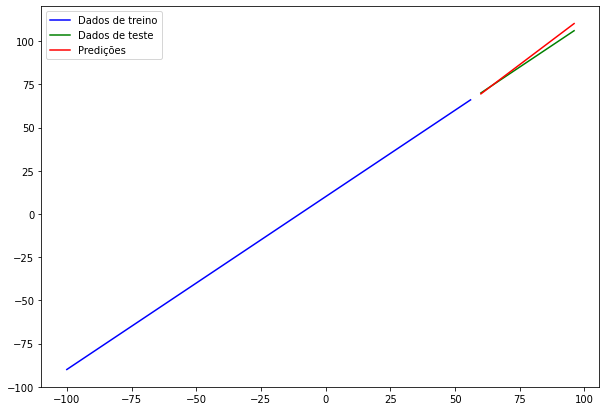

In [ ]:
# Faz e mostra as predições
y_pred_3 = model_3.predict(X_teste)
mostra_predicoes(predicoes=y_pred_3)

In [ ]:
# Calcular metodos de avaliação
mae_3 = mae(y_teste, y_pred_3)
mse_3 = mse(y_teste,y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Comparando os resultados dos nossos experimentos

In [ ]:
# Vamos comparar os resultados entre nossos experimentos utilizando o pandas
import pandas as pd

resultados_modelos = [["model_1", mae_1.numpy(), mse_1.numpy()],
                      ["model_2", mae_2.numpy(), mse_2.numpy()],
                      ["model_3", mae_3.numpy(), mse_3.numpy()]]   #Fazer primeiro sem ".numpy()" e depois com

resultados = pd.DataFrame(resultados_modelos, columns=["Modelo", "mae", "mse"])
resultados

,Modelo,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Pelo visto, o `model_2` teve a melhor performance...

In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Rastrear os resultados dos experimentos

Uma das melhores práticas em machine learning é a de acompanhar os resultados dos experimentos realizados. 

E ao fazer isso, pode ser uma ativiade tediosa caso você esteja realizando muitos experimentos. 

Mas, por sorte nossa, existem ferramenta que nos ajudam nisto!

* **TensorBoard** - Um componente da biblioteca TensorFlow para ajudar a acompanhar os experimentos.

* **Weights & Biases** - uma ferramenta para acompanhar vários tipos de experimentos em machine learning (plugins do TensorBoard).

### Salvando nossos modelos

Salvar nossos modelos nos permite utiliza-los fora do Google Collab (ou qualquer lugar que tenham sido treinados).

Existem dois principais formatos que podemos usar para nossos modelos:

1. O formato SavedModel (default)
2. O formato HDF5 (Pesquisar google)

In [ ]:
# Salvando o modelo utilizando o formato SavedModel
model_2.save("melhor_modelo_SavedModel")

INFO:tensorflow:Assets written to: melhor_modelo_SavedModel/assets


In [ ]:
# Salvando o modelo utilizando o formato HDF5
model_2.save("melhor_modelo.h5")

## Carregando um modelo salvo

In [ ]:
# Carregando um modelo no formato SavedModel
saved_model = tf.keras.models.load_model("/content/melhor_modelo_SavedModel")
saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comparar as predições do modelo carregado e do existente para verificar se são os mesmos
model_2_pred = model_2.predict(X_teste)
saved_model_pred = saved_model.predict(X_teste)

model_2_pred == saved_model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Fazer download de um modelo ou qualquer outro arquivo do Google Colab

Se você quiser fazer o download dos arquivos do Google Colab, você precisa:

1. Você precisa abrir a tab "Arquivos" e dar um clique direito no arquivo que você quer e logo após clicar em "download".

2. Utilizar em código (veja a célula abaixo)

3. Salvar diretamente no Google Drive (veja a segunda célula abaixo)

In [ ]:
# Fazer o download de um arquivo do Google Colab
from google.colab import files
files.download("/content/melhor_modelo.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Salvar um arquivo do Google Colab no Google Drive (requer que você monte o google drive)
!cp /content/melhor_modelo.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive